In [2]:
# Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as mat

In [3]:
data = pd.read_csv('assessment_data.csv')

# Data Cleaning and Exploration

In [4]:
# Viewing the first five records
data.head()

,target_var,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9
0,1,211.3375,0,0,bigollo-16,blue,29.0000,1,sigma,112.877941
1,1,151.5500,2,1,cantor-33,pink,0.9167,1,sigma,60.291423
2,0,151.5500,2,1,cantor-33,blue,2.0000,1,sigma,143.794103
3,0,151.5500,2,1,cantor-33,pink,30.0000,1,sigma,131.278352
4,0,151.5500,2,1,cantor-33,blue,25.0000,1,sigma,204.415716


In [5]:
# Data info 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 10 columns):
target_var    1309 non-null int64
feature_1     1308 non-null float64
feature_2     1309 non-null int64
feature_3     1309 non-null int64
feature_4     295 non-null object
feature_5     1309 non-null object
feature_6     1046 non-null float64
feature_7     1309 non-null int64
feature_8     1307 non-null object
feature_9     1309 non-null float64
dtypes: float64(3), int64(4), object(3)
memory usage: 102.3+ KB


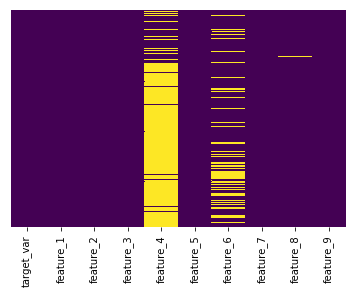

In [6]:
# Checking for null values that exits within dataset columns
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [7]:
# Getting the stats
data[['feature_1','feature_6', 'feature_9']].describe()

,feature_1,feature_6,feature_9
count,1308.000000,1046.000000,1309.000000
mean,33.295479,29.881135,101.794120
std,51.758668,14.413500,50.890853
min,0.000000,0.166700,-93.974333
25%,7.895800,21.000000,68.550768
50%,14.454200,28.000000,102.039185
75%,31.275000,39.000000,135.175053
max,512.329200,80.000000,264.692290


As a results of feature_4 having 80% null values, I am just going to drop it as it may spoil our analysis

In [8]:
data.drop('feature_4', axis=1, inplace= True)

Since feature_6 also have some null values, I am just going to set all null values to zeroes because deleting them would ruin the data as some valuable records from other columns will be deleted as well. 

In [9]:
data['feature_6'] = data['feature_6'].fillna(value = 0)

As a result of dropping feature_4 and filling zeroes in feature_6, I have a dataset with no null values

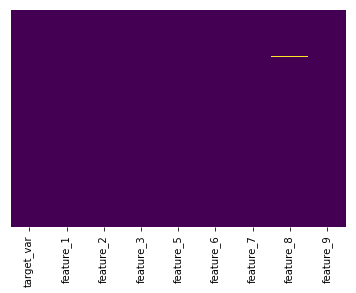

In [10]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Now that I have clean data, I am going to start with data exploration

### Count Plot

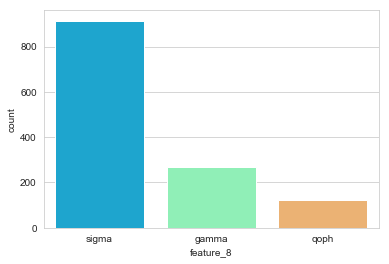

In [11]:
sns.set_style('whitegrid')
sns.countplot(x='feature_8',data=data,palette='rainbow')

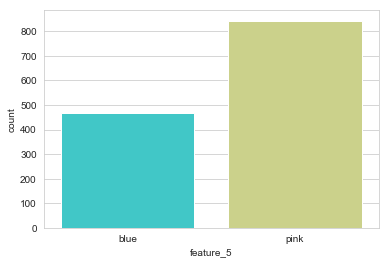

In [25]:
sns.set_style('whitegrid')
sns.countplot(x='feature_5',data=data,palette='rainbow')

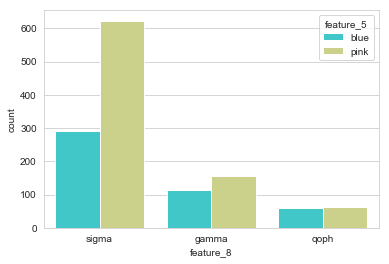

In [12]:
#checking counts for items from feature 5 in the binary expression of target_var
sns.set_style('whitegrid')
sns.countplot(x='feature_8',hue='feature_5',data=data,palette='rainbow')

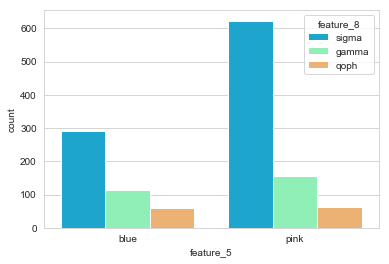

In [13]:
#checking counts for items from feature 8 in the binary expression of target_var
sns.set_style('whitegrid')
sns.countplot(x='feature_5',hue='feature_8',data=data,palette='rainbow')

### Pie Plot

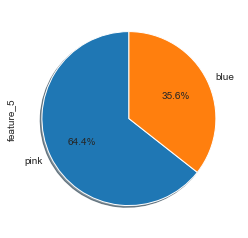

In [14]:
#The pie chart shows that there are more Pinks than blues
data['feature_5'].value_counts().plot.pie(autopct='%1.1f%%', shadow=True, startangle=90)
mat.gca().set_aspect('equal')

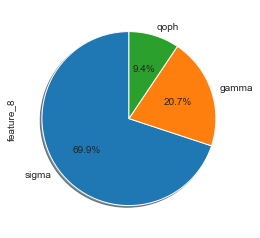

In [15]:
#The pie chart shows that there are more sigmas than gammas and qoph
data['feature_8'].value_counts().plot.pie(autopct='%1.1f%%', shadow=True, startangle=90)

mat.gca().set_aspect('equal')

### Boxplot

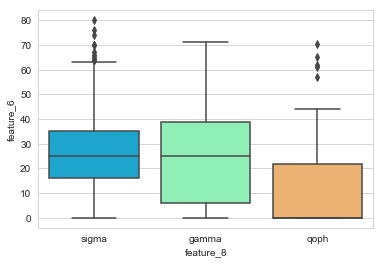

In [16]:
sns.boxplot(x="feature_8", y="feature_6", data=data,palette='rainbow')

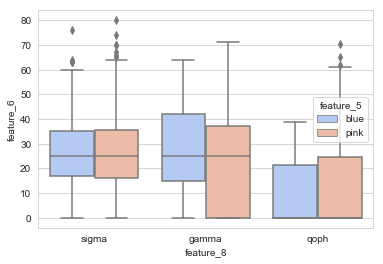

In [17]:
sns.boxplot(x="feature_8", y="feature_6", hue="feature_5",data=data, palette="coolwarm")

### Violinplot

C:\Users\Mosima\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


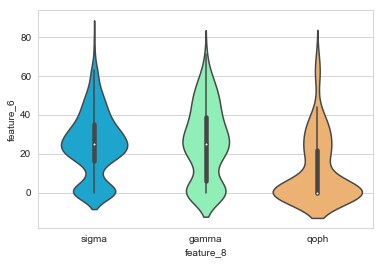

In [18]:
sns.violinplot(x="feature_8", y="feature_6", data=data,palette='rainbow')

C:\Users\Mosima\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


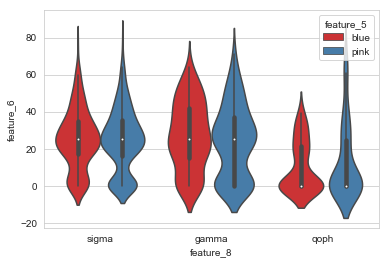

In [19]:
sns.violinplot(x="feature_8", y="feature_6", data=data,hue='feature_5',palette='Set1')

### Stripplot

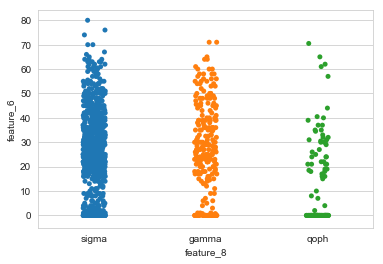

In [20]:
sns.stripplot(x="feature_8", y="feature_6", data=data,jitter=True)

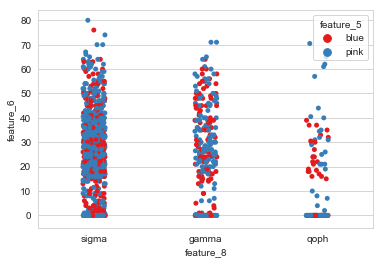

In [21]:
sns.stripplot(x="feature_8", y="feature_6", data=data,jitter=True,hue='feature_5',palette='Set1')

# Correlations

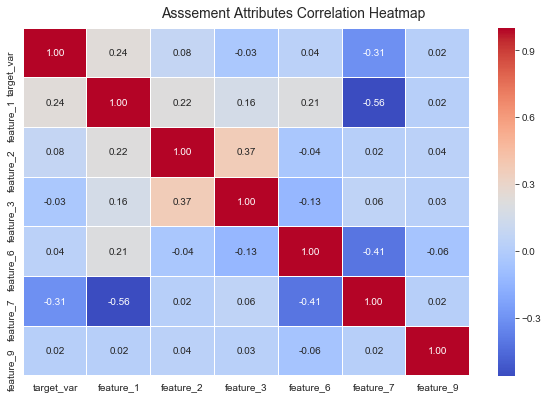

In [22]:
# I am showing data correlation or relationships amongst the features to check how relative they to each other
f, ax = mat.subplots(figsize=(10, 6))
corr = data.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Asssement Attributes Correlation Heatmap', fontsize=14)

### Correlations Cluster map

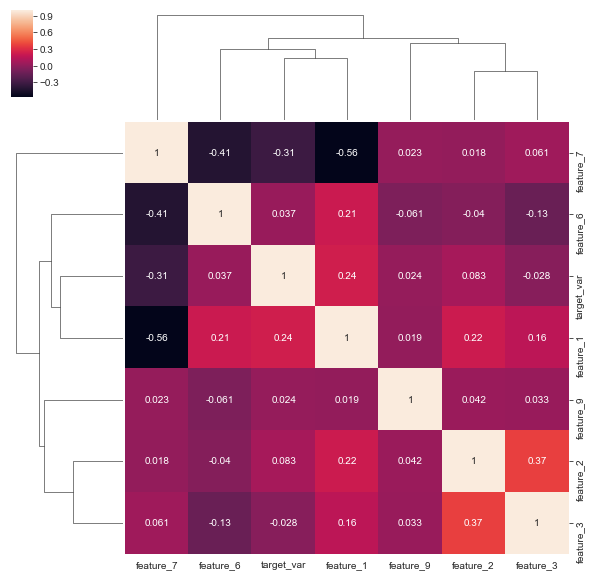

In [23]:
sns.clustermap(data.corr(),annot=True)

### Data Exploration Findings

From the data exploration I have discovered that:
    1. in feature_8 there are most sigma values compared to gamma and goph, and in feature_8 there are most Pink values compared to Blue values.
    2. looking at the box plot it is evident that Sigma and Qoph have outliers, in which most of those come from the Pink values. Gamma have a weird spread box with no outliers and have the highest Maximum number, with the 3 of them(gamma,sigma,oph) having equal minimum value. Sigma and Gamma have equal Median.
    3. Looking at the correlations and corrrelations cluster heatmap you will realize that there is little none similirity or relationship between data features, with feature_2 and feature_3 depicting greater relationship to the rest of data features.

# Model Building

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

In [27]:
data['feature_5'] = pd.get_dummies(data['feature_5'], drop_first = True)
data_2 = pd.get_dummies(data['feature_8'],drop_first=True)

In [28]:
data.drop('feature_8',axis=1,inplace=True)

In [29]:
data = pd.concat([data,data_2],axis=1)

In [30]:
data.dropna(inplace=True)

In [38]:

X_train, X_test, y_train, y_test = train_test_split(data.drop('target_var', axis=1), 
                                                    data['target_var'], test_size=0.50)

In [39]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [40]:
predictions = logmodel.predict(X_test)

### Model Evaluation

In [41]:
# confusion_metrics
print(confusion_matrix(y_test,predictions))

[[343  65]
 [ 75 171]]


In [42]:
# classification report to check for model accuracy
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.82      0.84      0.83       408
          1       0.72      0.70      0.71       246

avg / total       0.78      0.79      0.79       654



In [36]:
#coefficients
logmodel.coef_

array([[ 3.20862121e-03, -1.19277516e-01, -3.49829589e-01,
        -2.33523654e+00, -9.95459451e-04, -6.44817837e-01,
         3.38166109e-03, -3.42734101e-01, -5.12998639e-01]])

In [44]:
#log loss error
log_loss(y_test,predictions)

7.393701328930365

### Model Report

### Technical User

Looking at the classification report we will realize that f-score is 79%, through the overall model predictions
the model predicted wrong 140 times,and the value of log_loss sits at 7. So, looking at those results, the conclusion
is that the model performed poor, and that might have been because of none features relationships.

### Non Technical User

Out of 654 count of data the machine algorithm for predictions, the machine algorithm predicted 514 correct, and 140 wrong.
And such we conclude that the machine algorithm performed poor. 